# EV data - City of Austin 

### AustinTX-CS--01_EDA01.ipynb
ref: Plug-In EVerywhere Level 2 Charging Station Network
link: https://data.world/cityofaustin/k5hp-eece
<hr>

In [16]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
# set figure size 
sns.set(rc={'figure.figsize':(21,9)})

#geo 
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# nan
import missingno as msno



In [17]:
ls ..

LICENSE       QGIS/         README.md     code/
Notes/        README.ipynb  clean-data/   data/


In [18]:
df = pd.read_csv('../data/austin-tx/plug-in-everywhere-level-2-charging-station-network-1.csv')

In [19]:
df.shape

(467, 17)

In [20]:
df.head()

,Station Name,Address 1,Address 2,City,State,Postal Code,No. of Ports,Pricing Policy,Usage Access,Category,Subcategory,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,New Georeferenced Column,Pricing,Power Select
0,CATHERINE / CATHERINE 1,300 Barton Springs Rd,NaN,Austin,Texas,78704,2,$4.17/month PIE members $2/hr Non-Members,Multi-family residential,Multifamily Commercial,Apartment,J1772,240V,J1772,"(30.259096, -97.747775)",$4.17/month PIE members $2/hr Non-Members,40A
1,AUSTIN HQ / STATION 1,4200 Smith School Dr,NaN,Austin,Texas,78744,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,General,J1772,240V,J1772,"(30.192647, -97.714329)",$4.17/month PIE members $2/hr Non-Members,40A
2,SCHOOL / AKINS1,10701 S 1st St.,NaN,Austin,Texas,78748,2,$4.17/month PIE members $2/hr Non-Members,"Public (Municipal, as in library, street, etc)",Education,High School / Other,J1772,240V,J1772,"(30.147634, -97.801294)",$4.17/month PIE members $2/hr Non-Members,40A
3,MONOGRAM / HANDICAP,615 W 7th St,NaN,Austin,Texas,78701,1,$4.17/month PIE members $2/hr Non-Members,Multi-family residential,Multifamily Commercial,Apartment,J1772,--,--,"(30.270571, -97.748993)",$4.17/month PIE members $2/hr Non-Members,40A
4,FLATIRON DOMAIN / FLATIRON DOM 2,10727 domain dr,NaN,Austin,Texas,78758,2,$4.17/month PIE members $2/hr Non-Members,Multi-family residential,Multifamily Commercial,Apartment,J1772,240V,J1772,"(30.392852, -97.723729)",$4.17/month PIE members $2/hr Non-Members,40A


In [21]:
df.tail()

,Station Name,Address 1,Address 2,City,State,Postal Code,No. of Ports,Pricing Policy,Usage Access,Category,Subcategory,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,New Georeferenced Column,Pricing,Power Select
462,AISD PAC / AISD PAC #5,1301-1603 E 51st St,NaN,Austin,Texas,78723,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Education,High School / Other,J1772,240V,J1772,"(30.305204, -97.702108)",$4.17/month PIE members $2/hr Non-Members,40A
463,HPI 3700 / EV 6,4339 N Capital of Texas Hwy,NaN,Austin,Texas,78746,1,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,General,J1772,--,--,"(30.336616, -97.8076)",$4.17/month PIE members $2/hr Non-Members,40A
464,PIE AE / PALMER STATION3,736-820 Barton Springs Rd,NaN,Austin,Texas,78704,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Parking,Commercial,J1772,240V,J1772,"(30.259236, -97.751809)",$4.17/month PIE members $2/hr Non-Members,40A
465,ROSCOE PROPERTI / TRIO MAIN,2413-2433 S Pleasant Valley Rd,NaN,Austin,Texas,78741,2,$4.17/month PIE members $2/hr Non-Members,Multi-family residential,Multifamily Commercial,Apartment,J1772,240V,J1772,"(30.228786, -97.726326)",$4.17/month PIE members $2/hr Non-Members,40A
466,DSMCUT / EVSE01 FLOOR L7,501-573 E 15th St,NaN,Austin,Texas,78701,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Healthcare,Hospital / Treatment Center,J1772,240V,J1772,"(30.275261, -97.73458)",$4.17/month PIE members $2/hr Non-Members,40A


<br>

# Quick EDA
<hr>

#### Unique Values per Feature

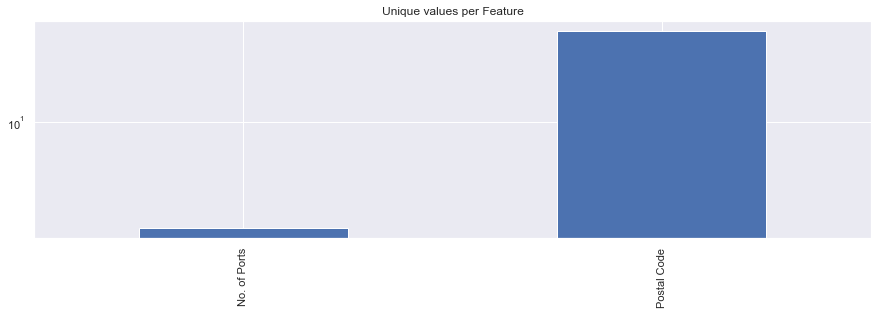

In [22]:
# See how many unique entries is in each numerical feature 
unique_values = df.select_dtypes(include= 'number').nunique().sort_values()

# Plot unique values with a y-axis in log-scale
unique_values.plot.bar(logy=True, figsize = (15,4), title='Unique values per Feature');


<br>

#### Check for Duplicates

In [23]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

#  Extract column names of all features
columns_to_consider = df.columns

# Drop duplicates based on 'columns_to_consider'
df_X = df.drop_duplicates(subset=columns_to_consider)
df_X.shape


You seem to have 0 duplicates in your database.


(467, 17)

In [24]:
# check duplicates
dif = set(df.index) - set(df_X.index) 
dif

set()

<br>

#### Nan

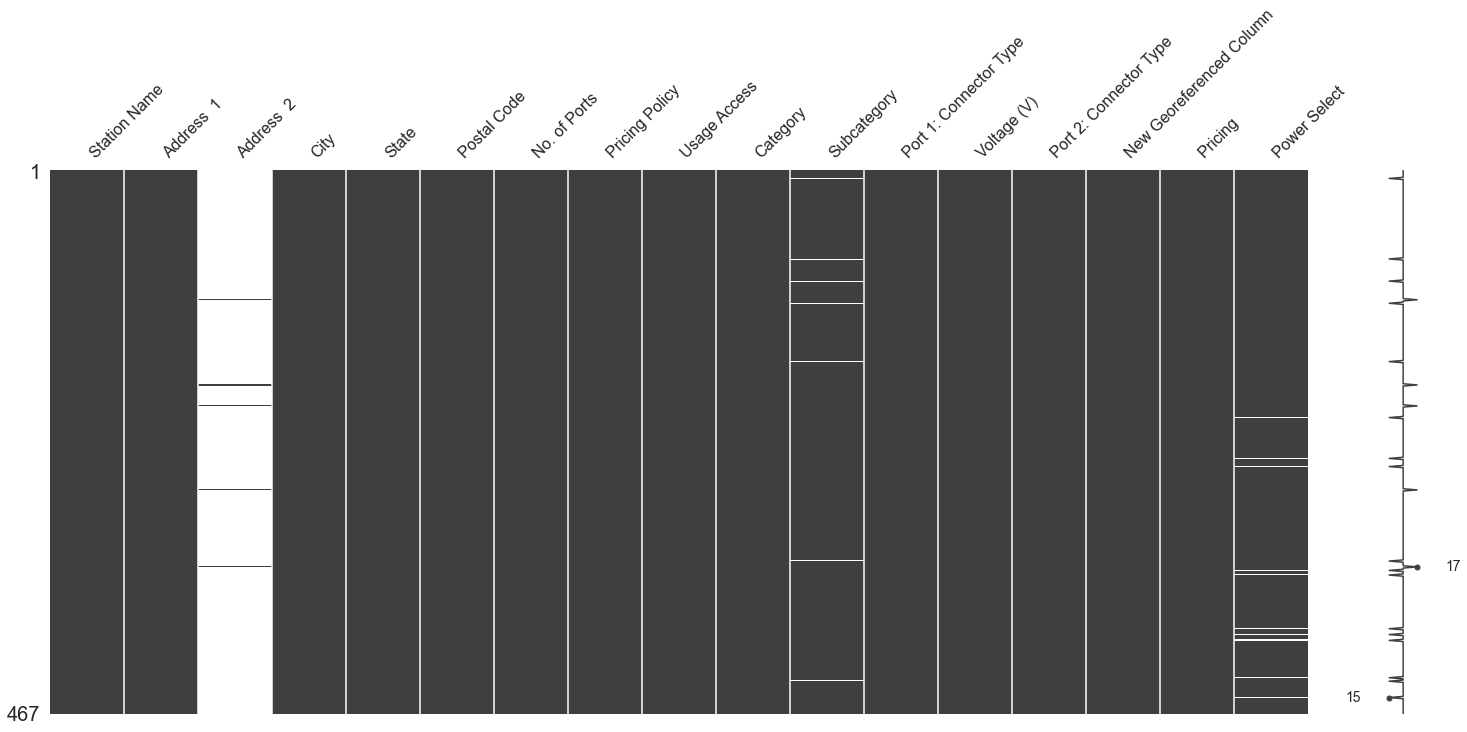

In [25]:
msno.matrix(df);

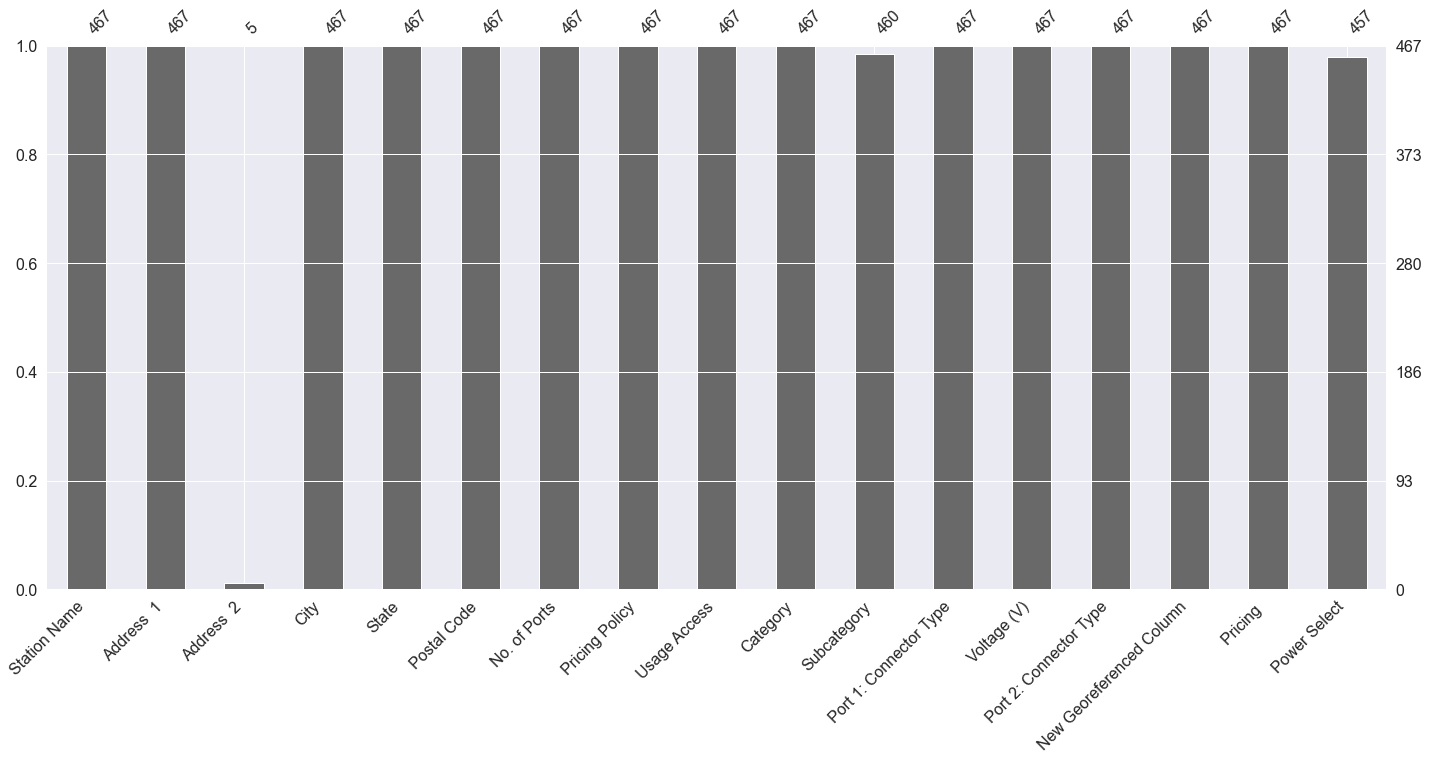

In [26]:
msno.bar(df);

<br>

#### Numerical Features

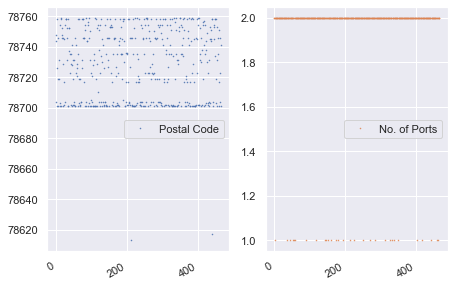

In [27]:
# 

df.plot(lw=0,
    marker='.',
    subplots=True,
    layout=(-1,4),
    figsize=(15,5),
    markersize=1);

<br>

#### Non-Numerical Features

In [28]:
# number of non-numerical features
df.select_dtypes(exclude=["number", "datetime"]).shape

(467, 15)

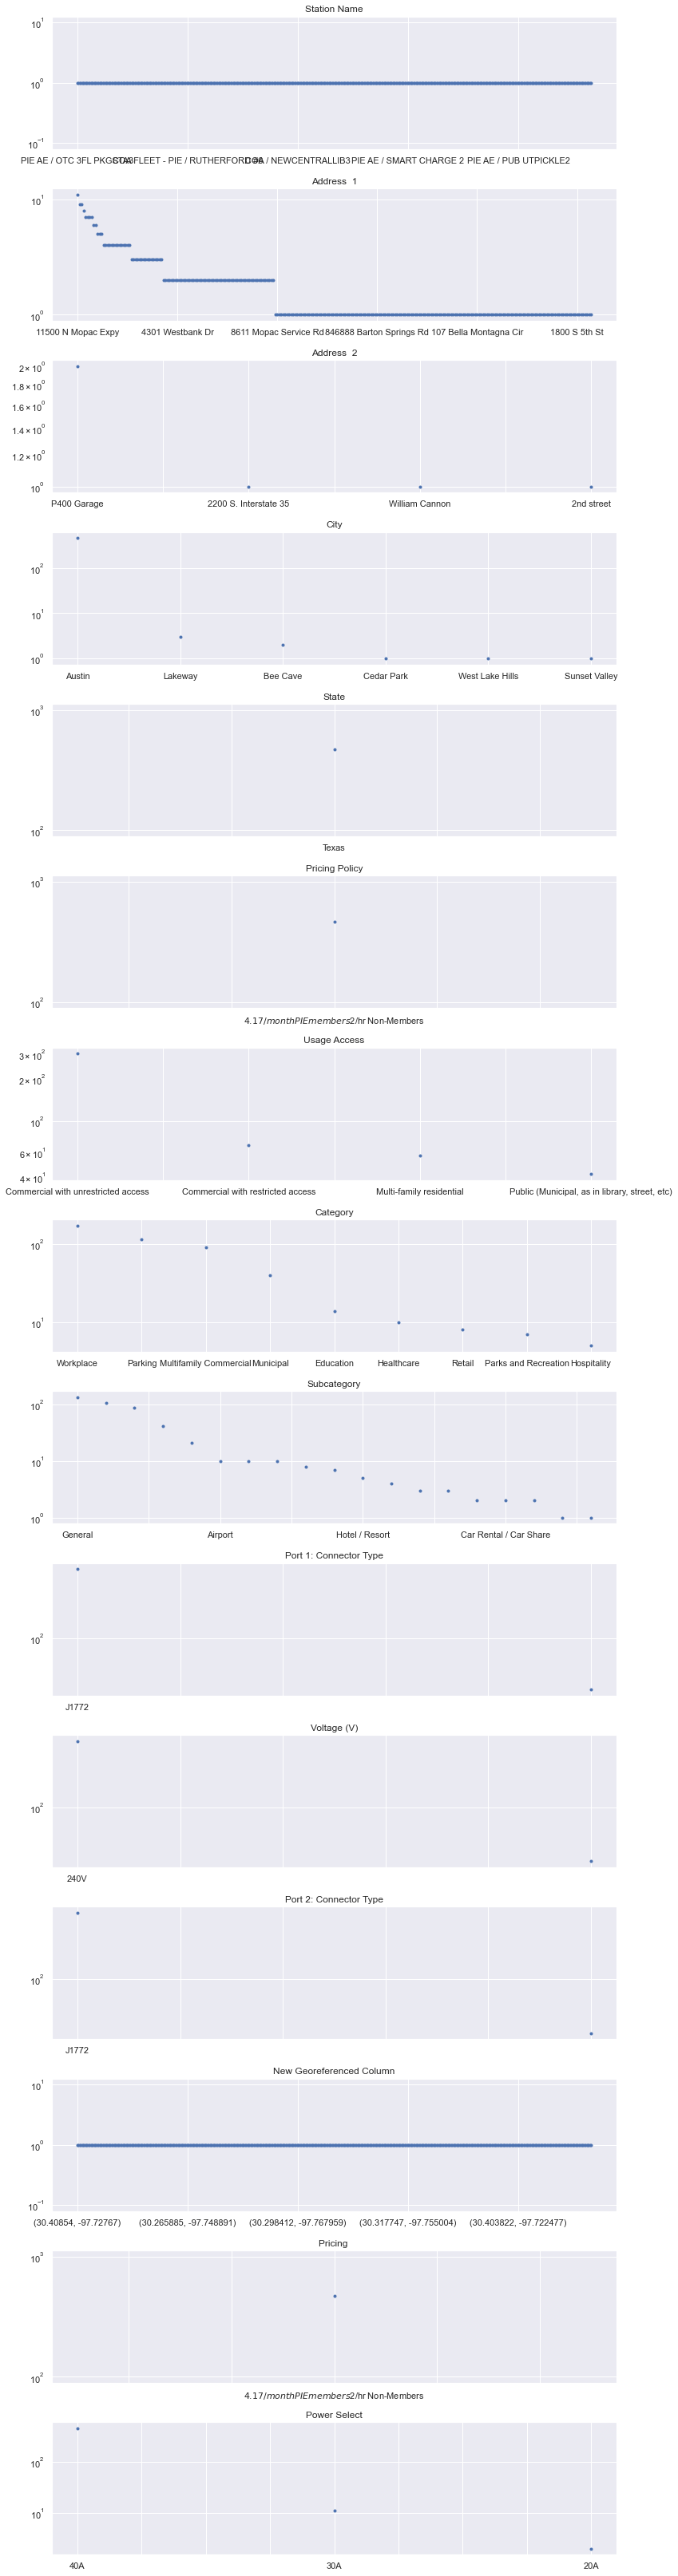

In [29]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=15, figsize=(12, 45))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

<br>

#### Feature Distrobution

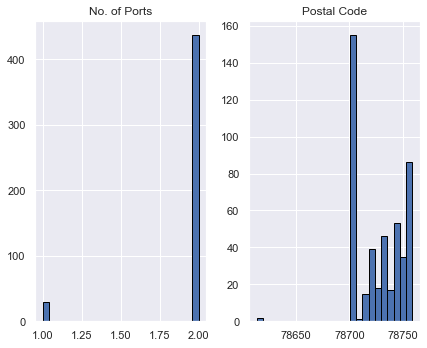

In [30]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [31]:
df.head(1).T

,0
Station Name,CATHERINE / CATHERINE 1
Address 1,300 Barton Springs Rd
Address 2,NaN
City,Austin
State,Texas
Postal Code,78704
No. of Ports,2
Pricing Policy,$4.17/month PIE members $2/hr Non-Members
Usage Access,Multi-family residential
Category,Multifamily Commercial


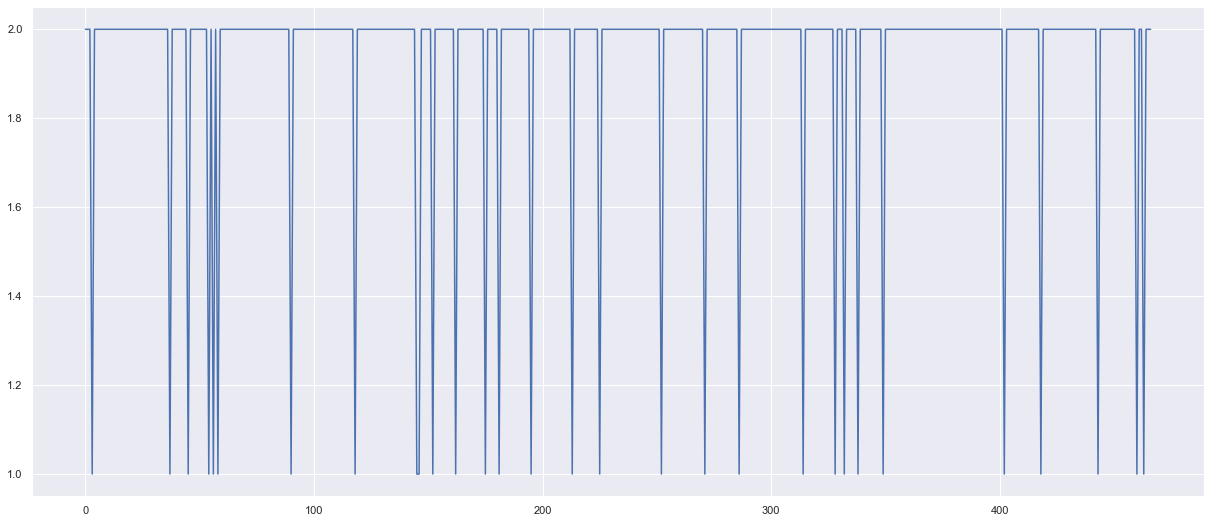

In [32]:
plt.plot(df['No. of Ports'] )

In [33]:
df.columns

Index(['Station Name', 'Address  1', 'Address  2', 'City', 'State',
       'Postal Code', 'No. of Ports', 'Pricing Policy', 'Usage Access',
       'Category', 'Subcategory', 'Port 1: Connector Type', 'Voltage (V)',
       'Port 2: Connector Type', 'New Georeferenced Column', 'Pricing ',
       'Power Select'],
      dtype='object')

# Feature Creation
<hr>


In [34]:
# adding latitude and longitude lines
df['latitude'] = 0.0
df['longitude'] = 0.0

In [35]:
# slices the '' columns and creates lat and long columns

for index, row in df.iterrows():
    lat, long = row['New Georeferenced Column'].replace('(','').replace(')','').replace(' ','').split(',')
    # .at faster then .loc
    df.at[index, 'latitude'] = float(lat)           
    df.at[index, 'longitude'] = float(long) 


<hr>

<br>

# EDA
<hr>



### Columns - POWER

#### No. of Ports

In [ ]:
# No. of Ports

print('normailzed')
print( df['No. of Ports'].value_counts(normalize= True)*100  )
print('Counts')
df['No. of Ports'].value_counts()

<br>

#### Volage (V)

In [ ]:
# 'Voltage (V)'

df['Voltage (V)'].value_counts()

                 ?What are the 30 row count that appear both in 'Voltage' and 'ports'? 

<br>

#### Power Select

In [ ]:
# Power Select

df['Power Select'].value_counts()


In [ ]:
df['Power Select'].value_counts(normalize=True)*100


<br>


#### Pricing Policy

In [ ]:
# 'Pricing Policy'

df['Pricing Policy'].value_counts()

<br>

#### Port 1: Connector Type

In [ ]:
# 'Port 1: Connector Type'

df['Port 1: Connector Type'].value_counts()

<br>

#### Port 2: Connector Type

In [37]:
df['Port 2: Connector Type'].value_counts()

J1772    437
--        30
Name: Port 2: Connector Type, dtype: int64

<br>

### Columns - DEMOGRAPHIC

#### Usage Access

In [38]:
# Usage Access

df['Usage Access'].value_counts()

Commercial with unrestricted access               301
Commercial with restricted access                  67
Multi-family residential                           57
Public (Municipal, as in library, street, etc)     42
Name: Usage Access, dtype: int64

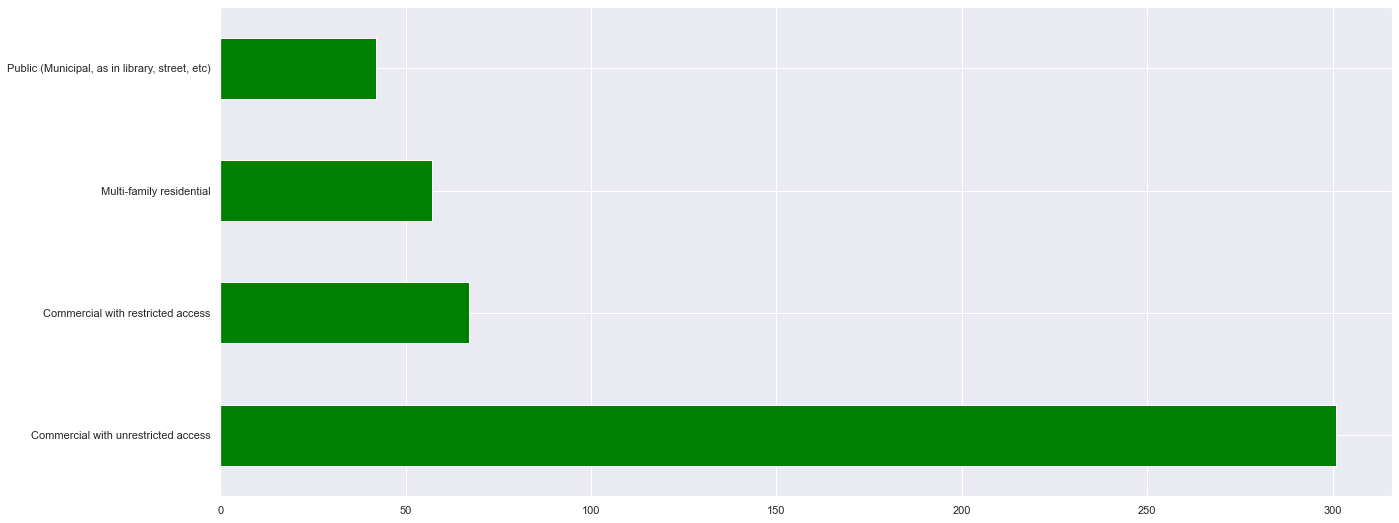

In [39]:
ax = df['Usage Access'].value_counts().plot(kind = 'barh', color = 'green' );


#### Category

In [40]:
# Category

df['Category'].value_counts()

Workplace                 175
Parking                   117
Multifamily Commercial     91
Municipal                  40
Education                  14
Healthcare                 10
Retail                      8
Parks and Recreation        7
Hospitality                 5
Name: Category, dtype: int64

In [41]:

df['Category'].value_counts()

Workplace                 175
Parking                   117
Multifamily Commercial     91
Municipal                  40
Education                  14
Healthcare                 10
Retail                      8
Parks and Recreation        7
Hospitality                 5
Name: Category, dtype: int64

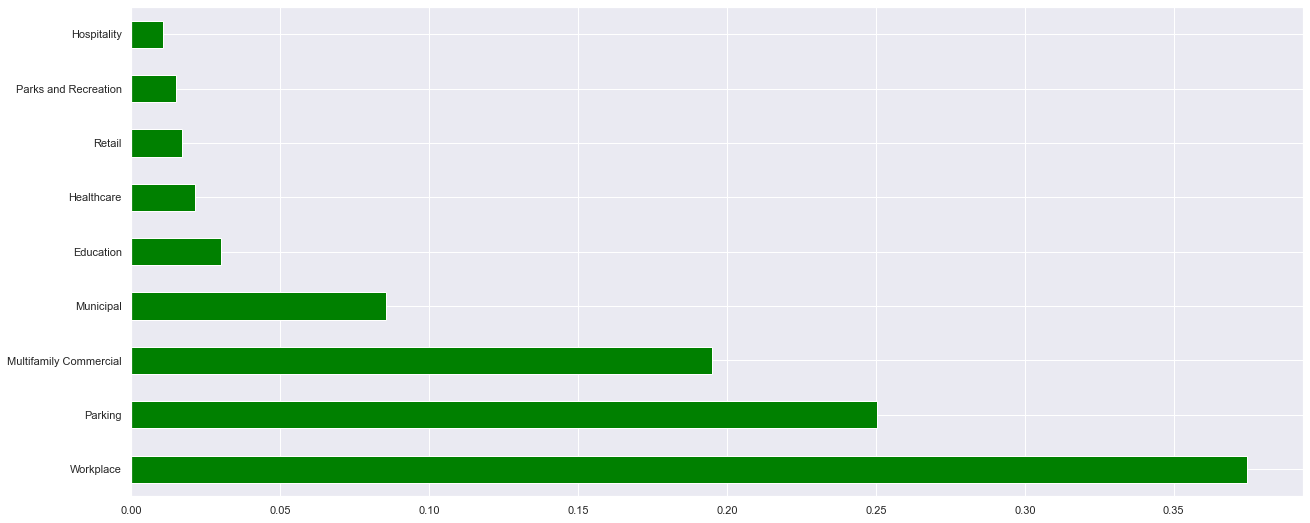

In [42]:
# Category counts in percentage of whole. 
df['Category'].value_counts(normalize = True).plot(kind = 'barh', color = 'green' );

<BR>

#### Subcategory

In [43]:
# Subcategory

df['Subcategory'].value_counts()

General                          134
Commercial                       107
Apartment                         89
High-Tech                         41
Municipal Fleet                   21
Airport                           10
Hospital / Treatment Center       10
High School / Other               10
Library                            8
Municipal Workplace                7
Hotel / Resort                     5
University / College               4
Shopping Center                    3
Municipal Parking                  3
Condominium                        2
Car Rental / Car Share             2
Big Box / Superstore               2
Parks and Recreation (Public)      1
Strip Mall                         1
Name: Subcategory, dtype: int64

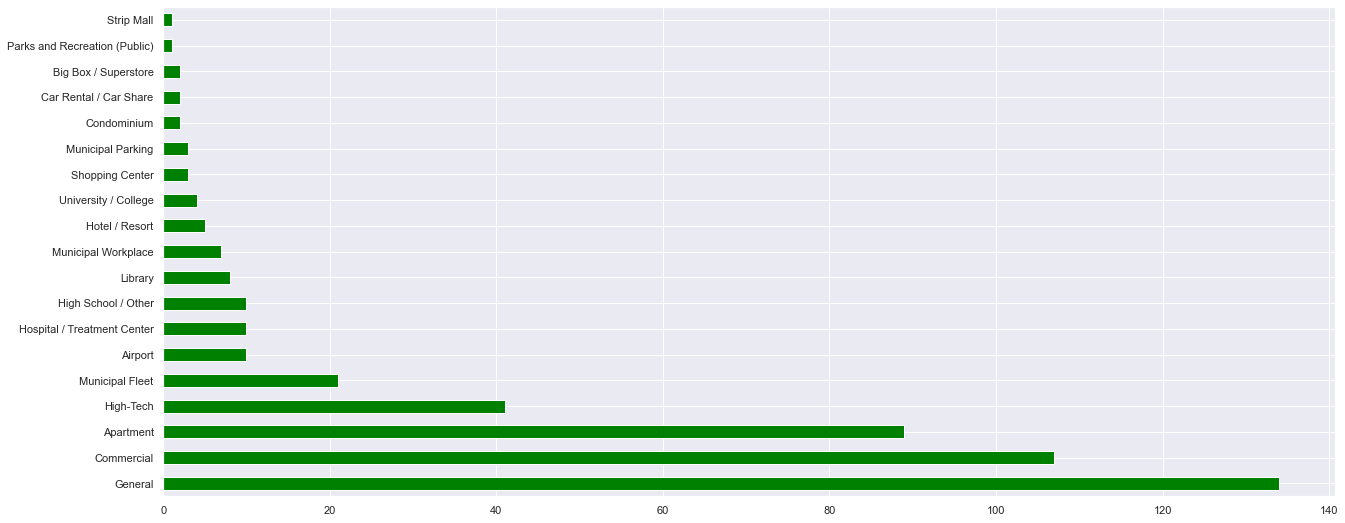

In [44]:
df['Subcategory'].value_counts().plot(kind = 'barh', color = 'green' );

#### Relationships between USAGE ACCESS, CATEGORY, SUBCATEGORY

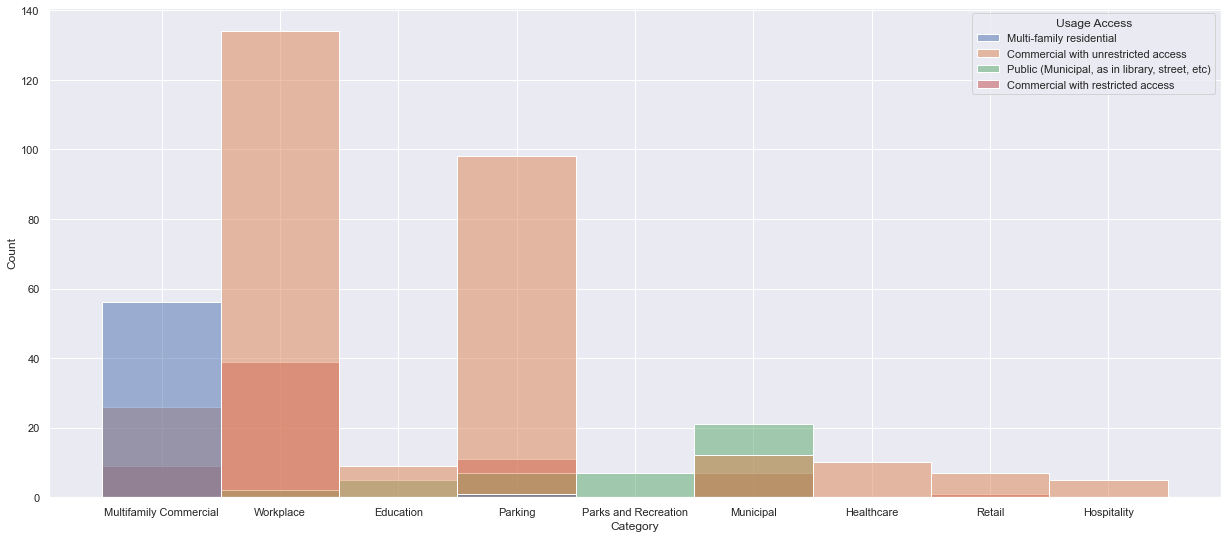

In [45]:

# histogram of category wiht Usage Access on top 
sns.histplot(data = df, x ='Category', hue = 'Usage Access');

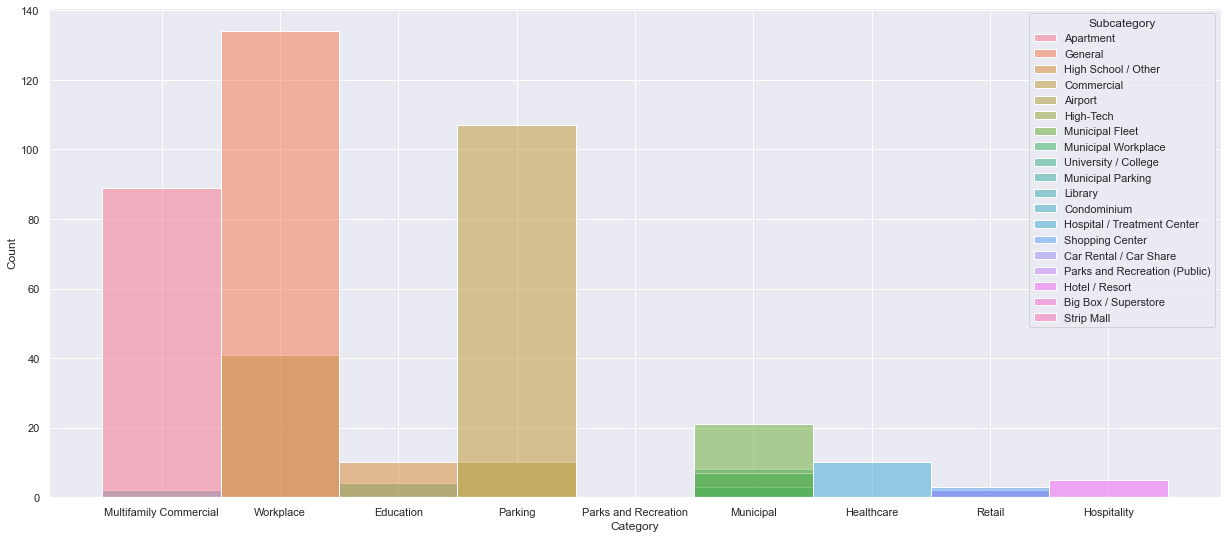

In [46]:
# histogram of category wiht Subcategory on top 
sns.histplot(data = df, x ='Category', hue = 'Subcategory');



In [47]:
# create a list of all the subcategory names
pd.get_dummies(df['Subcategory']).columns

Index(['Airport', 'Apartment', 'Big Box / Superstore',
       'Car Rental / Car Share', 'Commercial', 'Condominium', 'General',
       'High School / Other', 'High-Tech', 'Hospital / Treatment Center',
       'Hotel / Resort', 'Library', 'Municipal Fleet', 'Municipal Parking',
       'Municipal Workplace', 'Parks and Recreation (Public)',
       'Shopping Center', 'Strip Mall', 'University / College'],
      dtype='object')

In [48]:
# count of Subcategory that apply to a Category 

df_category_inspection = pd.concat( [df[['Category']], pd.get_dummies(df['Subcategory'])], axis = 1)
df_category_inspection.groupby('Category')[['Airport', 'Apartment', 'Big Box / Superstore',
       'Car Rental / Car Share', 'Commercial', 'Condominium', 'General',
       'High School / Other', 'High-Tech', 'Hospital / Treatment Center',
       'Hotel / Resort', 'Library', 'Municipal Fleet', 'Municipal Parking',
       'Municipal Workplace', 'Parks and Recreation (Public)',
       'Shopping Center', 'Strip Mall', 'University / College']].sum().T

Category,Education,Healthcare,Hospitality,Multifamily Commercial,Municipal,Parking,Parks and Recreation,Retail,Workplace
Airport,0,0,0,0,0,10,0,0,0
Apartment,0,0,0,89,0,0,0,0,0
Big Box / Superstore,0,0,0,0,0,0,0,2,0
Car Rental / Car Share,0,0,0,0,0,0,0,2,0
Commercial,0,0,0,0,0,107,0,0,0
Condominium,0,0,0,2,0,0,0,0,0
General,0,0,0,0,0,0,0,0,134
High School / Other,10,0,0,0,0,0,0,0,0
High-Tech,0,0,0,0,0,0,0,0,41
Hospital / Treatment Center,0,10,0,0,0,0,0,0,0


<br> 

#### New Georeferenced Column 


In [49]:


"""
  Color labels for different attributes of 'Subcategory'

"""
def color_producer(val):
    if val == 'Workplace':
        return 'darkred'
    if val == 'Parking':
        return 'orange'
    if val == 'Multifamily Commercial':
        return 'blue'
    if val == 'Municipal':
        return 'pink'
    if val == 'Education':
        return 'green'
    if val == 'Healthcare':
        return 'darkblue'
    if val == 'Retail':
        return 'cadetblue'
    if val == 'Parks and Recreation':
        return 'darkpurple'
    if val == 'Hospitality':
        return 'gray'
    else:
        return 'forestgreen'




map = folium.Map(location=[30.274477, -97.737767], tiles='cartodbpositron', zoom_start=10)


mc = MarkerCluster()
for idx, row in df.iterrows():
    #if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
    mc.add_child(Marker([row['latitude'], row['longitude']]))
map.add_child(mc)


tooltip = 'click'
for i in range(0,len(df)):
    #print(df.iloc[i]['Subcategory'])
   
    Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=10,
        color=color_producer(df.iloc[i]['Category'])).add_to(map)
       


map